In [3]:
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray
import seaborn as sns
# load the image
image = Image.open('ORANGE.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(750, 750, 4)
<class 'PIL.Image.Image'>
RGBA
(750, 750)


In [4]:
def imagedata(file):
    image = Image.open(file)
    data = asarray(image)
    R = []
    G = []
    B = []
    for i in data:
        for j in i:
            R.append(j[0])
            G.append(j[1])
            B.append(j[2])
    rgb = pd.DataFrame([R,G,B]).transpose()
    rgb.columns = ['Red','Green','Blue']
    return rgb

In [5]:
# creating list for RGB values
R = []
G = []
B = []
# iterating through data and adding values into respective list
for i in data:
    for j in i:
        R.append(j[0])
        G.append(j[1])
        B.append(j[2])
rgb = pd.DataFrame([R,G,B]).transpose()
rgb.columns = ['Red','Green','Blue']
rgb

,Red,Green,Blue
0,209,117,110
1,223,111,101
2,220,112,97
3,206,123,100
4,216,114,71
...,...,...,...
562495,213,118,65
562496,214,123,73
562497,216,121,67
562498,220,121,62


In [41]:
N = 562500
#red_prob = rgb['Red'].value_counts()/N
#green_prob = rgb['Green'].value_counts()/N
#blue_prob = rgb['Blue'].value_counts()/N

In [42]:
def entropy(x):
    H = -np.sum(x*np.log10(x))
    return H

In [43]:
def relative_condent(C, D, rgb):
    cd_joint = rgb[[C,D]].value_counts()/N
    cd_joint_df = cd_joint.sort_index().to_frame().reset_index()
    c_prob = rgb[C].value_counts()/N
    d_prob = rgb[D].value_counts()/N
    d_dict = d_prob.sort_index().to_frame().to_dict()[D]
    cd_joint_df['probD'] = cd_joint_df[D].apply(lambda x: d_dict.get(x))
    cd_joint_df.columns = [C,D,'Joint','ProbD']
    cd_joint_df['CondProb'] = cd_joint_df['Joint']/cd_joint_df['ProbD']
    hcd = -np.sum(cd_joint_df['Joint']*np.log10(cd_joint_df['CondProb']))
    hrcd = hcd/entropy(c_prob)
    return hrcd

In [44]:
orange_rgb = imagedata('ORANGE.png')

In [24]:
#relative_condent('Blue','Green',orange_rgb)

0.595410679950209

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [54]:
def colors_hr(image_rgb):
    rg = relative_condent('Red','Green', image_rgb)
    rb = relative_condent('Red','Blue', image_rgb)
    gr = relative_condent('Green', 'Red', image_rgb)
    gb = relative_condent('Green', 'Blue', image_rgb)
    br = relative_condent('Blue', 'Red', image_rgb)
    bg = relative_condent('Blue','Green', image_rgb)
    hr_matrix = pd.DataFrame([[0, rg, rb], [gr, 0, gb], [br, bg, 0]])
    hr_matrix.columns = ['Red','Green','Blue']
    hr_matrix.index = ['Red','Green','Blue']
    heatmap = sns.heatmap(hr_matrix, annot = True, fmt='.3', 
                          cmap='Reds', linewidths=1, linecolor='black').set(title = "Conditional Entropy of Red MM Painting")
    return heatmap

[Text(0.5, 1.0, 'Conditional Entropy of Orange MM Painting')]

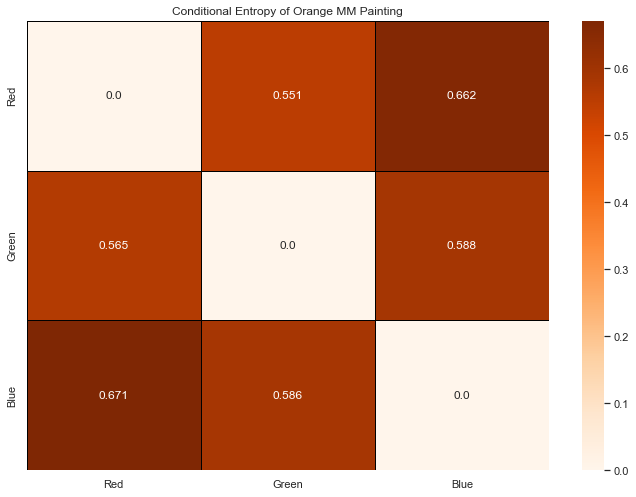

In [46]:
colors_hr(orange_rgb)

In [48]:
# egg blue, red, turq
blue = imagedata('BLUE.jpeg')

[Text(0.5, 1.0, 'Conditional Entropy of Blue MM Painting')]

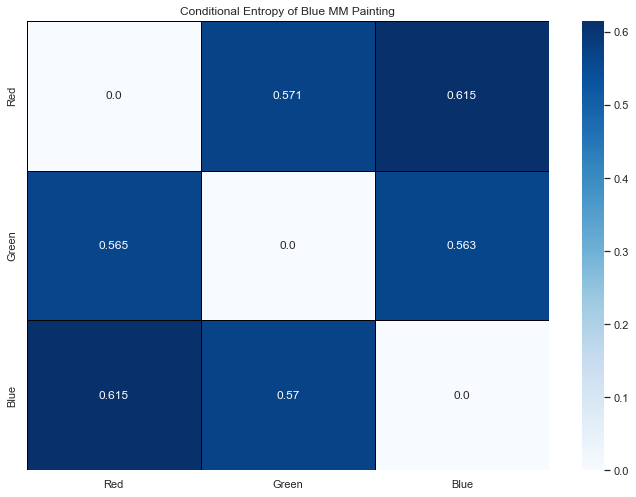

In [49]:
colors_hr(blue)

In [52]:
eggblue = imagedata('AQUA.png')

[Text(0.5, 1.0, 'Conditional Entropy of Aqua MM Painting')]

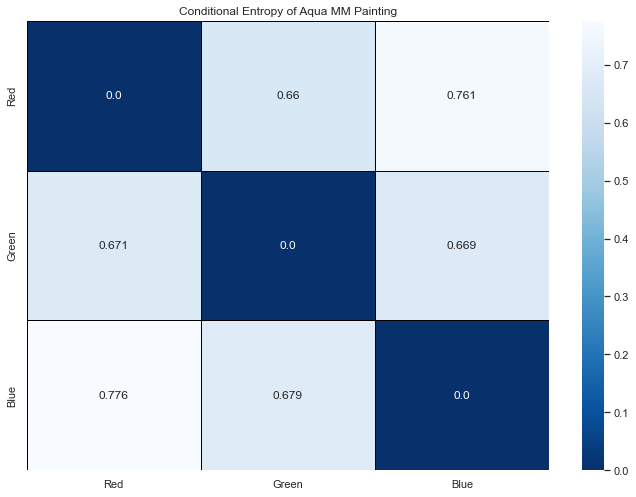

In [53]:
colors_hr(eggblue)

In [55]:
red = imagedata('red.png')

[Text(0.5, 1.0, 'Conditional Entropy of Red MM Painting')]

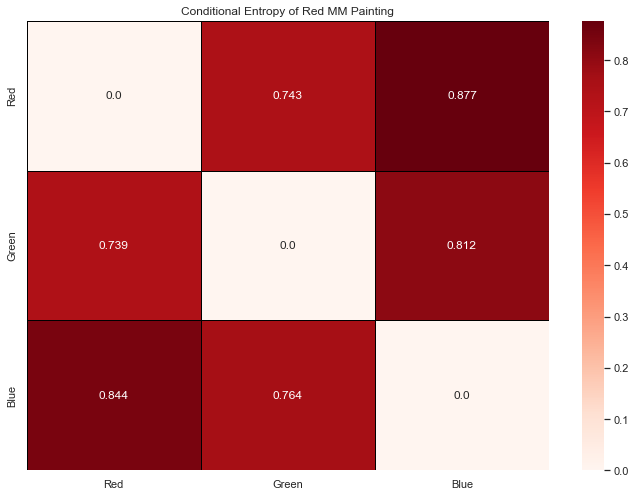

In [56]:
colors_hr(red)

In [39]:
turq = imagedata('GREEN.png')

[Text(0.5, 1.0, 'Conditional Entropy of Green MM Painting')]

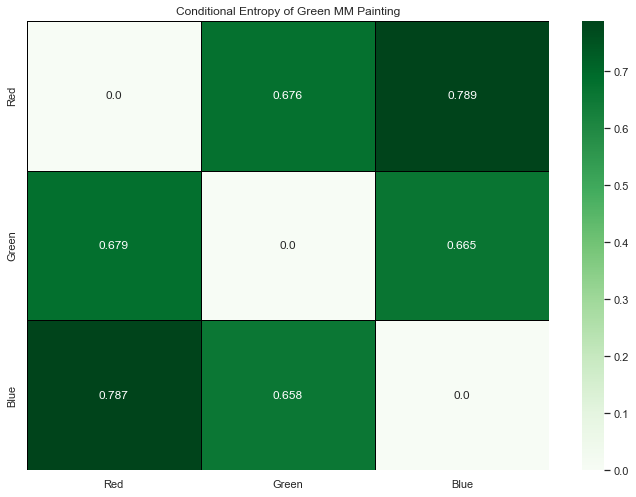

In [40]:
colors_hr(turq)